In [1]:
import json 
import cv2 
import os
import glob

In [2]:
VIDEO_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos"
SUBSET = "*"
TRAIN_OR_VAL = "test"
OVERHEAD_OR_VEHICLE = "*"

video_paths = sorted(glob.glob(f"{VIDEO_PATH}/{TRAIN_OR_VAL}/{SUBSET}/{OVERHEAD_OR_VEHICLE}/*.mp4"))
video_paths_dict = {video_path.split("/")[-1][:-4] : video_path for video_path in video_paths}

print(video_paths_dict)

{'20230707_11_SY3_T1_Camera1_0': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/test/20230707_11_SY3_T1/overhead_view/20230707_11_SY3_T1_Camera1_0.mp4', '20230707_11_SY3_T1_Camera2_1': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/test/20230707_11_SY3_T1/overhead_view/20230707_11_SY3_T1_Camera2_1.mp4', '20230707_11_SY3_T1_Camera2_2': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/test/20230707_11_SY3_T1/overhead_view/20230707_11_SY3_T1_Camera2_2.mp4', '20230707_11_SY3_T1_Camera3_3': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/test/20230707_11_SY3_T1/overhead_view/20230707_11_SY3_T1_Camera3_3.mp4', '20230707_11_SY3_T1_vehicle_view': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/test/20230707_11_SY3_T1/vehicle_view/20230707_11_SY3_T1_vehicle_view.mp4', '20230707_14_CN16_T1_Camera1_0': '/home/totuanan/Workplace/AICityChal

In [3]:
OUTPUT_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES"

In [4]:
WEATHER_FEATURE = "environment"

In [5]:
# f = open(f"pedestrian_{WEATHER_FEATURE}.json")
# g = open(f"vehicle_{WEATHER_FEATURE}.json")

# pedestrian_data = json.load(f)
# vehicle_data = json.load(g)

# for classes in pedestrian_data:
#     for video_name in pedestrian_data[classes]:
#         vidObj = cv2.VideoCapture(video_paths_dict[video_name])
#         video_type = video_paths_dict[video_name].split("/")[-2]
#         length = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
#         half_point = length//2 # Approximately half if number of frames are odd

#         # Set the reader to the given frame number (half_point)
#         vidObj.set(cv2.CAP_PROP_POS_FRAMES, half_point)
#         success, image = vidObj.read() 

#         output_path = f"{OUTPUT_PATH}/{WEATHER_FEATURE}/{classes}/{video_type}"
#         print(output_path)
#         os.makedirs(output_path, exist_ok=True)
#         if not os.path.isfile(f"{output_path}/{video_name}.png"):
#             cv2.imwrite(f"{output_path}/{video_name}.png", image) 
         

# ENIVRONMENT

In [6]:
ENV_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/environment"
CLASSES = ["dark", "bright"]
OVERHEAD_OR_VEHICLE = "vehicle_view"

BRIGHT_PATH = f"{ENV_PATH}/bright/{OVERHEAD_OR_VEHICLE}"
DARK_PATH = f"{ENV_PATH}/dark/{OVERHEAD_OR_VEHICLE}"

for img in glob.glob(f"{DARK_PATH}/*.png"):
    img_path = img.split("/")[-1]
    if os.path.isfile(f"{BRIGHT_PATH}/{img_path}"):
        os.remove(f"{BRIGHT_PATH}/{img_path}")

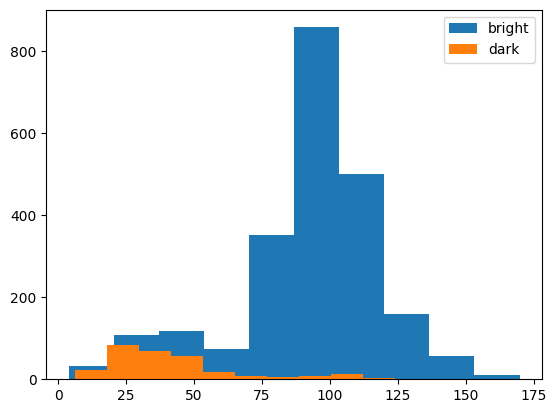

In [7]:
import cv2
import numpy as np
 
# import necessary packages
import matplotlib.pyplot as plt

ENV_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/environment"
CLASSES = ["dark", "bright"]
OVERHEAD_OR_VEHICLE = "vehicle_view"
img_color = {}

for classes in CLASSES:
    img_color[classes] = []
    for input_img in sorted(glob.glob(f"{ENV_PATH}/{classes}/{OVERHEAD_OR_VEHICLE}/*.png")):
        src_img = cv2.imread(input_img)
        average_color_row = np.average(src_img, axis=0)
        average_color = np.average(average_color_row, axis=0)
        img_color[classes].append(np.average(average_color, axis=0))

plt.hist(img_color["bright"], label="bright")
plt.hist(img_color["dark"], label="dark")
plt.legend()
plt.show()


In [11]:
import pandas as pd

df_bright = pd.DataFrame(img_color["bright"])
df_dark = pd.DataFrame(img_color["dark"])

df_bright.describe()

,0
count,2271.000000
mean,92.039675
std,26.672161
min,3.849740
25%,83.789516
50%,95.643538
75%,107.245190
max,169.804406


In [12]:
df_dark.describe()

,0
count,287.000000
mean,41.839897
std,24.337569
min,6.036689
25%,25.446225
50%,36.069154
75%,47.930228
max,123.990130


In [30]:
df_dark.quantile(0.85)

0    60.732027
Name: 0.85, dtype: float64

# Investigating

In [32]:
import cv2
import numpy as np
 
# import necessary packages
import matplotlib.pyplot as plt

ENV_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/environment"
OUT_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/environment/label_dark"
CLASSES = ["dark", "bright"]
OVERHEAD_OR_VEHICLE = "vehicle_view"
dark_video_name = []

for classes in CLASSES:
    img_color[classes] = []
    for input_img in sorted(glob.glob(f"{ENV_PATH}/{classes}/{OVERHEAD_OR_VEHICLE}/*.png")):
        src_img = cv2.imread(input_img)
        average_color_row = np.average(src_img, axis=0)
        average_color = np.average(average_color_row, axis=0)
        if np.average(average_color, axis=0) <= 60:
            
            #os.remove(f"{OUT_PATH}/{OVERHEAD_OR_VEHICLE}/{input_img.split('/')[-1]}")
            if not os.path.isfile(f"{OUT_PATH}/{OVERHEAD_OR_VEHICLE}/{input_img.split('/')[-1]}"):
                print("Hit")
                cv2.imwrite(f"{OUT_PATH}/{OVERHEAD_OR_VEHICLE}/{input_img.split('/')[-1]}", src_img)

